# 1.读取数据

In [1]:
import pandas as pd
filepath='./data/0.txt'
data=pd.read_csv(filepath,encoding='GB2312',header=0,names=['里程(m)','轨距(mm)','超高(mm)','左轨向(mm)', '右轨向(mm)', '左高低(mm)', '右高低(mm)', '三角坑(mm)', '水平(mm)'])
data['num']=0

for i in range(1,72):
    filepath='./data/'+str(i)+'.txt'    #可迭代的路径
    data1=pd.read_csv(filepath,encoding='GB2312',header=0,names=['里程(m)','轨距(mm)','超高(mm)','左轨向(mm)', '右轨向(mm)', '左高低(mm)', '右高低(mm)', '三角坑(mm)', '水平(mm)'])
    # 多加一列num用于记录是哪个月的
    data1['num']=i
    data=pd.concat([data,data1])
data

data=data.reset_index(drop=True)

# 2.处理异常值

In [2]:
# 计算空值个数
print(data.isnull().sum())

里程(m)      0
轨距(mm)     0
超高(mm)     0
左轨向(mm)    0
右轨向(mm)    0
左高低(mm)    0
右高低(mm)    0
三角坑(mm)    0
水平(mm)     0
num        0
dtype: int64


In [3]:
# 查看数据是否存在异常值
dis_mean=data['轨距(mm)'].mean()
dis_std = data['超高(mm)'].std()
topnum1 =dis_mean+2*dis_std
bottomnum1 = dis_mean-2*dis_std
print(data.head(10))
print("正常值的范围：",topnum1,bottomnum1)
print("是否存在超出正常范围的值：",any(data['里程(m)']>topnum1))
print("是否存在小于正常范围的值：",any(data['里程(m)']<bottomnum1))


      里程(m)    轨距(mm)    超高(mm)   左轨向(mm)   右轨向(mm)   左高低(mm)   右高低(mm)  \
0  40074.00  0.223478 -3.870873 -0.441738 -0.573044  0.127826  0.021306   
1  40074.25  0.151567 -3.786470 -0.509217 -0.458037  0.130000  0.034903   
2  40074.50  0.012090 -3.780000 -0.590746 -0.367115  0.169303  0.057861   
3  40074.75 -0.122414 -3.953317 -0.704536 -0.286976  0.219390  0.256951   
4  40075.00 -0.260535 -4.094745 -0.887908 -0.135778  0.095778  0.310000   
5  40075.25 -0.440342 -4.705543 -1.104080 -0.020873 -0.121993  0.333738   
6  40075.50 -0.757553 -4.860000 -1.300672  0.000000 -0.431693  0.316210   
7  40075.75 -1.052529 -4.788473 -1.363842 -0.063580 -0.555632  0.262315   
8  40076.00 -1.245402 -4.698317 -1.282387 -0.072035 -0.522211  0.234070   
9  40076.25 -1.208161 -4.528339 -1.092375 -0.014125 -0.438161  0.190089   

    三角坑(mm)    水平(mm)  num  
0 -0.365216 -0.231740    0  
1 -0.447060 -0.115880    0  
2 -0.632935 -0.019254    0  
3 -0.680000 -0.070902    0  
4 -0.632628 -0.184745    0  


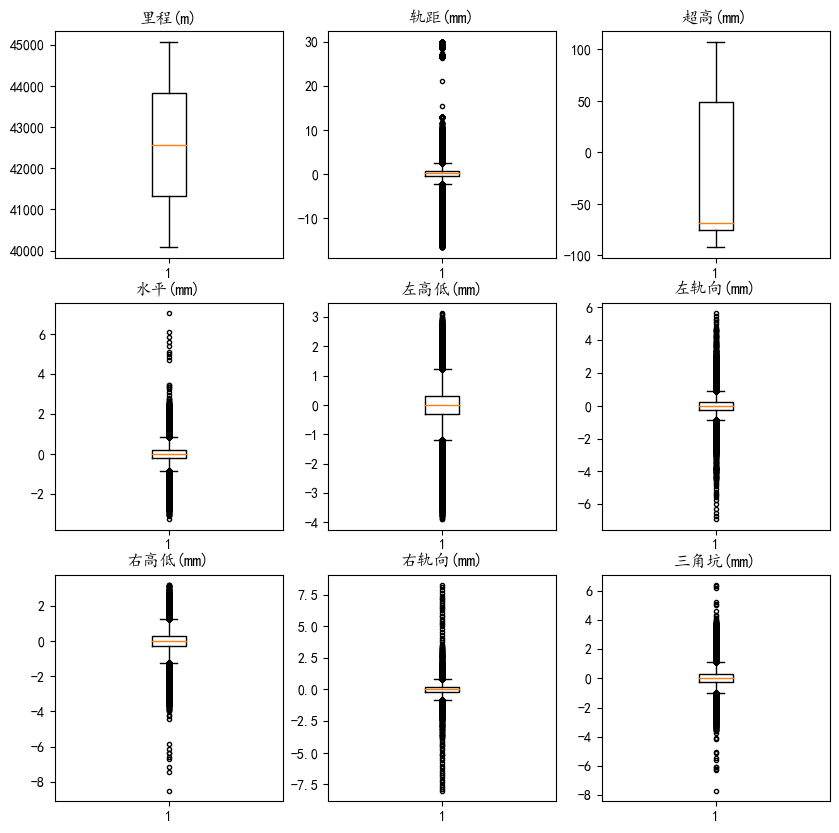

In [4]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(10, 10))
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['boxplot.flierprops.markersize'] = 3 # 调整箱线图异常值在图中的大小，默认为6

matplotlib.rc("font",family='KaiTi')
plt.subplot(331)
plt.boxplot(x=data['里程(m)'])
plt.title('里程(m)')

plt.subplot(332)
plt.boxplot(x=data['轨距(mm)'])
plt.title('轨距(mm)')

plt.subplot(333)
plt.boxplot(x=data['超高(mm)'])
plt.title('超高(mm)')

plt.subplot(334)
plt.boxplot(x=data['水平(mm)'])
plt.title('水平(mm)')

plt.subplot(335)
plt.boxplot(x=data['左高低(mm)'])
plt.title('左高低(mm)')

plt.subplot(336)
plt.boxplot(x=data['左轨向(mm)'])
plt.title('左轨向(mm)')

plt.subplot(337)
plt.boxplot(x=data['右高低(mm)'])
plt.title('右高低(mm)')

plt.subplot(338)
plt.boxplot(x=data['右轨向(mm)'])
plt.title('右轨向(mm)')

plt.subplot(339)
plt.boxplot(x=data['三角坑(mm)'])
plt.title('三角坑(mm)')

plt.show()


In [5]:
# 异常值处理
# 通常的处理方式是取数据中的最大最小值进行异常值替换。
import pandas as pd
import numpy as np

att=['里程(m)','轨距(mm)','超高(mm)','左轨向(mm)', '右轨向(mm)', '左高低(mm)', '右高低(mm)', '三角坑(mm)', '水平(mm)']
for s in att:
    mean1 = data[s].quantile(q=0.25)#下四分位差
    mean2 = data[s].quantile(q=0.75)#上四分位差
    mean3 = mean2-mean1#中位差
    topnum2 = mean2+1.5*mean3
    bottomnum2 = mean2-1.5*mean3
    print("正常值的范围：",topnum2,bottomnum2)
    print("是否存在超出正常范围的值：",any(data[s]>topnum2))
    print("是否存在小于正常范围的值：",any(data[s]<bottomnum2))

    replace_value1=data[s][data[s]<topnum2].max()
    data.loc[data[s]>topnum2,s]=replace_value1
    replace_value2=data[s][data[s]>bottomnum2].min()
    data.loc[data[s]<bottomnum2,s]=replace_value2



正常值的范围： 47573.625 40074.0
是否存在超出正常范围的值： False
是否存在小于正常范围的值： False
正常值的范围： 2.43503325 -1.1154892499999998
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True
正常值的范围： 236.67045625000003 -138.23409125
是否存在超出正常范围的值： False
是否存在小于正常范围的值： False
正常值的范围： 0.894711125 -0.446316625
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True
正常值的范围： 0.8652449999999999 -0.4320449999999999
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True
正常值的范围： 1.2331765 -0.5942419999999999
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True
正常值的范围： 1.2579951249999999 -0.603586625
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True
正常值的范围： 1.087438625 -0.501279625
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True
正常值的范围： 0.84 -0.42000000000000004
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True


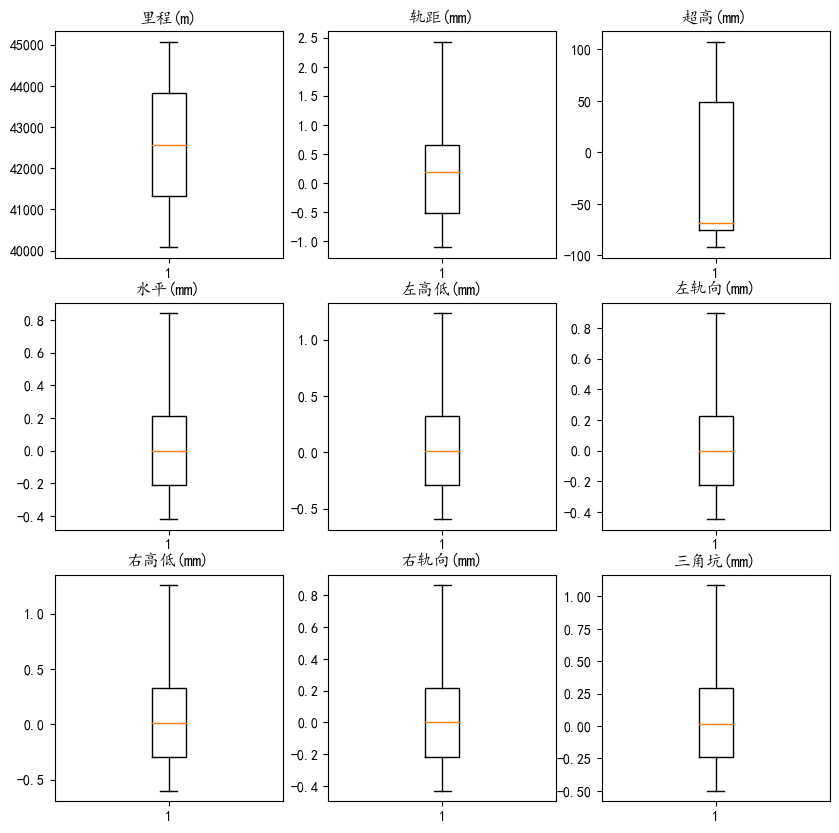

In [6]:
plt.figure(figsize=(10, 10))
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['boxplot.flierprops.markersize'] = 3 # 调整箱线图异常值在图中的大小，默认为6

plt.subplot(331)
plt.boxplot(x=data['里程(m)'])
plt.title('里程(m)')

plt.subplot(332)
plt.boxplot(x=data['轨距(mm)'])
plt.title('轨距(mm)')

plt.subplot(333)
plt.boxplot(x=data['超高(mm)'])
plt.title('超高(mm)')

plt.subplot(334)
plt.boxplot(x=data['水平(mm)'])
plt.title('水平(mm)')

plt.subplot(335)
plt.boxplot(x=data['左高低(mm)'])
plt.title('左高低(mm)')

plt.subplot(336)
plt.boxplot(x=data['左轨向(mm)'])
plt.title('左轨向(mm)')

plt.subplot(337)
plt.boxplot(x=data['右高低(mm)'])
plt.title('右高低(mm)')

plt.subplot(338)
plt.boxplot(x=data['右轨向(mm)'])
plt.title('右轨向(mm)')

plt.subplot(339)
plt.boxplot(x=data['三角坑(mm)'])
plt.title('三角坑(mm)')

plt.show()


# 3.计算TQI

In [7]:
# 2016年1月滑动TQI沿里程变化的序列数据
import numpy as np

TQI=[]
for i in range(0,len(data1)-800):
    temp_data=data.loc[data.index[i:i+800]]
    # python中对于矩阵的计算尽量不要在DataFrame中，效率非常低。应该使用numpy
    a1=np.array(temp_data['三角坑(mm)'])
    a2=np.array(temp_data['右轨向(mm)'])
    a3=np.array(temp_data['右高低(mm)'])
    a4=np.array(temp_data['左轨向(mm)'])
    a5=np.array(temp_data['左高低(mm)'])
    a6=np.array(temp_data['轨距(mm)'])
    a7=np.array(temp_data['水平(mm)'])
    re=a1.std()+a2.std()+a3.std()+a4.std()+a5.std()+a6.std()+a7.std()
    TQI.append(re)


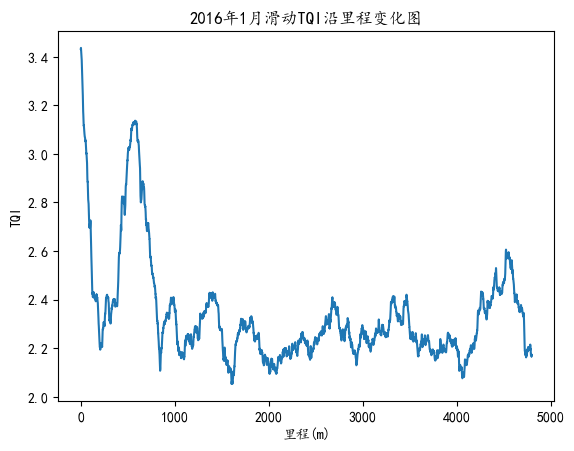

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rc("font",family='KaiTi')

x=np.arange(0,4800,0.25)

plt.title("2016年1月滑动TQI沿里程变化图")
plt.xlabel("里程(m)")
plt.ylabel("TQI")

plt.plot(x,TQI)

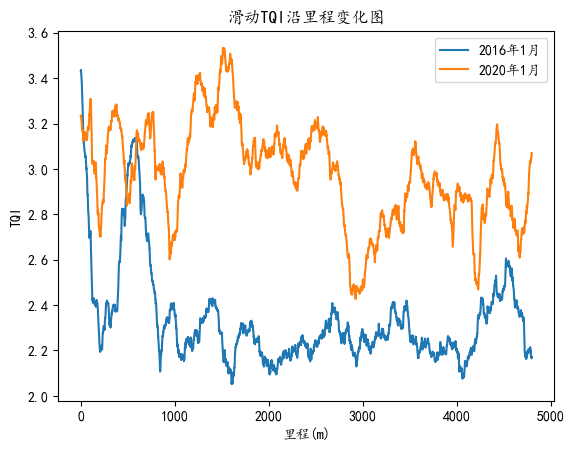

In [9]:
# 2020年1月滑动TQI沿里程变化的序列数据
TQI_2=[]
for i in range(len(data1)*48,len(data1)*49-800):
    temp_data=data.loc[data.index[i:i+800]]
    # python中对于矩阵的计算尽量不要在DataFrame中，效率非常低。应该使用numpy
    a1=np.array(temp_data['三角坑(mm)'])
    a2=np.array(temp_data['右轨向(mm)'])
    a3=np.array(temp_data['右高低(mm)'])
    a4=np.array(temp_data['左轨向(mm)'])
    a5=np.array(temp_data['左高低(mm)'])
    a6=np.array(temp_data['轨距(mm)'])
    a7=np.array(temp_data['水平(mm)'])
    re=a1.std()+a2.std()+a3.std()+a4.std()+a5.std()+a6.std()+a7.std()
    TQI_2.append(re)

x=np.arange(0,4800,0.25)



plt.plot(x,TQI,label='2016年1月')
plt.plot(x,TQI_2,label='2020年1月')

plt.title("滑动TQI沿里程变化图")
plt.xlabel("里程(m)")
plt.ylabel("TQI")
plt.legend()

# 4.高低不平顺标准差预测

以K44+074段的左高低为例进行研究

In [10]:
input_data=[]
for i in range(72):
    temp_data=data.loc[data.index[len(data1)*i+16000:len(data1)*i+20000]]
    temp=np.array(temp_data['左高低(mm)'])
    input_data.append(temp.std())
    

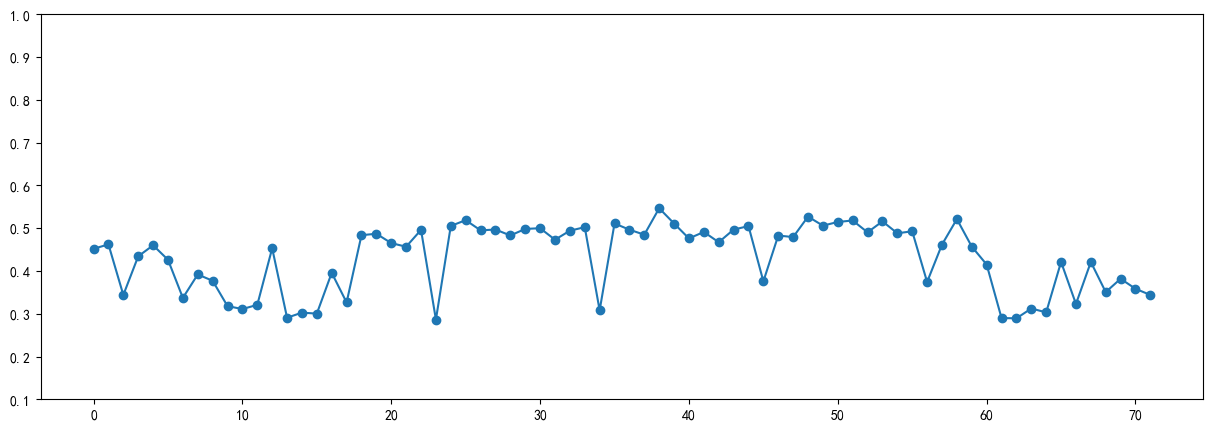

In [11]:
from matplotlib.pyplot import MultipleLocator
#从pyplot导入MultipleLocator类，这个类用于设置刻度间隔

fig = plt.figure(figsize=(15,5))    # 设置画布大小
plt.ylim(0.1,1)  # y轴显示范围
plt.plot(input_data,'o-')

In [12]:
train_data=input_data[0:48]
test_data=input_data[48:60]

## 4.1 ARIMA模型

d:\work\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


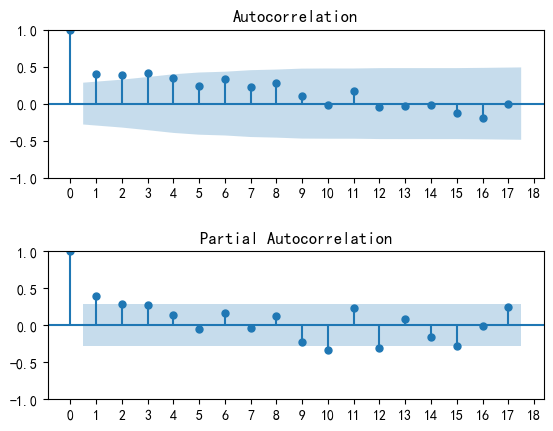

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # 画图定阶

def draw_acf(data):
    # 利用ACF判断模型阶数
    plot_acf(data)
    plt.title("序列自相关图(ACF)")
    plt.show()

def draw_pacf(data):
    # 利用PACF判断模型阶数
    plot_pacf(data)
    plt.title("序列偏自相关图(PACF)")
    plt.show()
    
def draw_acf_pacf(data):
    f = plt.figure(facecolor='white')
    # 构建第一个图
    ax1 = f.add_subplot(211)
    # 把x轴的刻度间隔设置为1，并存在变量里
    x_major_locator = MultipleLocator(1)
    plot_acf(data,  ax=ax1)
    # 构建第二个图
    ax2 = f.add_subplot(212)
    plot_pacf(data, ax=ax2)
    plt.subplots_adjust(hspace=0.5)
    # 把x轴的主刻度设置为1的倍数
    ax1.xaxis.set_major_locator(x_major_locator)
    ax2.xaxis.set_major_locator(x_major_locator)
    plt.show()

draw_acf_pacf(np.array(train_data))

In [14]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pmdarima as pm

built_arimamodel = pm.auto_arima(train_data,
                                 start_p=0,   # p最小值
                                 start_q=0,   # q最小值
                                 test='adf',  # ADF检验确认差分阶数d
                                 max_p=5,     # p最大值
                                 max_q=5,     # q最大值
                                 m=11,        # 季节性周期长度，当m=1时则不考虑季节性
                                 d=None,      # 通过函数来计算d
                                 seasonal=True, start_P=0, D=1, trace=True,
                                 error_action='ignore', suppress_warnings=True,
                                 stepwise=False  # stepwise为False则不进行完全组合遍历
                                 )
print(built_arimamodel.summary())



 ARIMA(0,1,0)(0,1,0)[11]             : AIC=-60.398, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[11]             : AIC=-61.354, Time=0.04 sec
 ARIMA(0,1,0)(0,1,2)[11]             : AIC=-60.815, Time=0.12 sec
 ARIMA(0,1,0)(1,1,0)[11]             : AIC=-60.540, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[11]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(1,1,2)[11]             : AIC=-58.826, Time=0.38 sec
 ARIMA(0,1,0)(2,1,0)[11]             : AIC=-60.762, Time=0.19 sec
 ARIMA(0,1,0)(2,1,1)[11]             : AIC=-58.761, Time=0.17 sec
 ARIMA(0,1,0)(2,1,2)[11]             : AIC=-56.817, Time=0.44 sec
 ARIMA(0,1,1)(0,1,0)[11]             : AIC=-68.229, Time=0.02 sec
 ARIMA(0,1,1)(0,1,1)[11]             : AIC=-71.086, Time=0.05 sec
 ARIMA(0,1,1)(0,1,2)[11]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,1)(1,1,0)[11]             : AIC=-69.686, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[11]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,1)(1,1,2)[11]             : AIC=-67.991, Time=0.20 sec
 ARIMA(0,1,1)(2,1,0)[1

MSE: 0.0007306701687066625
MAE: 0.024024667973952415


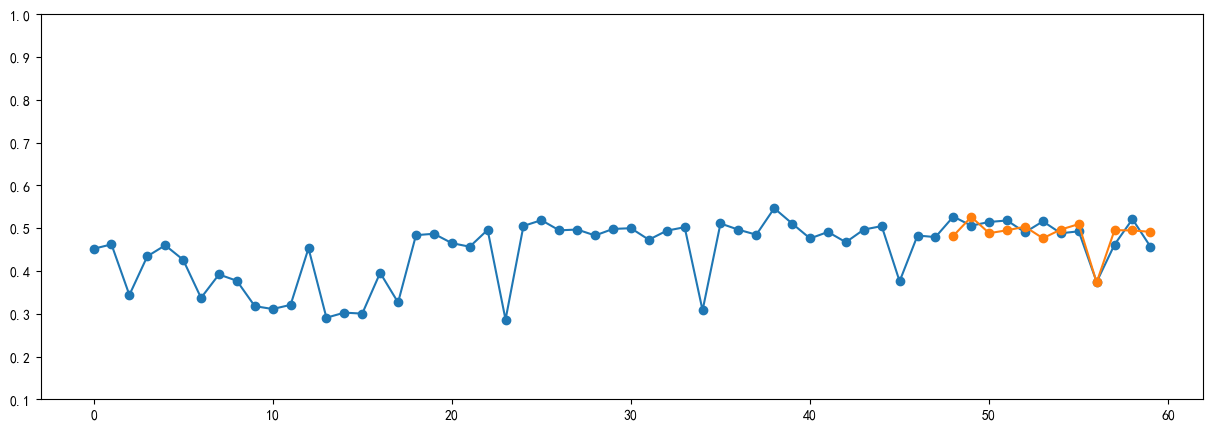

In [15]:
from sklearn.metrics import mean_squared_error # 均方误差
from sklearn.metrics import mean_absolute_error # 平方绝对误差

forecast = built_arimamodel.predict(12)

x=np.arange(0,60,1)
fig = plt.figure(figsize=(15,5))    # 设置画布大小
plt.ylim(0.1,1)  # y轴显示范围
plt.plot(x,input_data[0:60],'o-')
plt.plot(x[48:60],forecast,'o-')

mse=mean_squared_error(forecast,test_data)
mae=mean_absolute_error(forecast,test_data)
print("MSE:",mse)
print("MAE:",mae)